In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mn

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(display='diagram')

#Nate shared this list as his ultimate go-to during our regresssion hack-a-thon

In [3]:
df_ames_train = pd.read_csv('./datasets/train.csv')

I know I need to split my data into train/test before I do any data transformations and build any models.

In [5]:
df_ames_ridge_cat_train = df_ames_train[['Overall Qual','Gr Liv Area', 'Garage Cars',
'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath',
'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Neighborhood',
'Open Porch SF', 'Wood Deck SF', 'Lot Area', 'SalePrice']]

In [6]:
df_ames_ridge_cat_train.isna().sum()

Overall Qual      0
Gr Liv Area       0
Garage Cars       1
Total Bsmt SF     1
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
TotRms AbvGrd     0
Fireplaces        0
BsmtFin SF 1      1
Neighborhood      0
Open Porch SF     0
Wood Deck SF      0
Lot Area          0
SalePrice         0
dtype: int64

In [7]:
#I am totally okay with dropping the rows with missing data
df_ames_ridge_cat_train.dropna(inplace=True)

C:\Users\sarah\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [8]:
df_ames_ridge_cat_train.isna().sum()

Overall Qual      0
Gr Liv Area       0
Garage Cars       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
TotRms AbvGrd     0
Fireplaces        0
BsmtFin SF 1      0
Neighborhood      0
Open Porch SF     0
Wood Deck SF      0
Lot Area          0
SalePrice         0
dtype: int64

In [10]:

X = df_ames_ridge_cat_train[['Overall Qual','Gr Liv Area', 'Garage Cars',
'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath',
'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1','Neighborhood',
'Open Porch SF', 'Wood Deck SF', 'Lot Area']]
y = df_ames_ridge_cat_train['SalePrice']
    

In [11]:
X.shape

(2049, 15)

In [12]:
y.shape

(2049,)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
X_train.dtypes

Overall Qual        int64
Gr Liv Area         int64
Garage Cars       float64
Total Bsmt SF     float64
1st Flr SF          int64
Year Built          int64
Year Remod/Add      int64
Full Bath           int64
TotRms AbvGrd       int64
Fireplaces          int64
BsmtFin SF 1      float64
Neighborhood       object
Open Porch SF       int64
Wood Deck SF        int64
Lot Area            int64
dtype: object

In [36]:
ct1 = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_include=([X_train['Overall Qual'], X_train['Neighborhood']]))),
    remainder='passthrough',
    verbose_feature_names_out=False
)
ct1

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000167C64C1700>)],
                  verbose_feature_names_out=False)

In [37]:
pipe3 = make_pipeline(ct1, StandardScaler(), Ridge(max_iter=10_000))

In [38]:
params3 = {
           'ridge__alpha': [.01, 0.1, 1, 10, 100]}

In [39]:
gs3 = GridSearchCV(pipe3, params3, n_jobs=-1)

In [40]:
pipe3.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'standardscaler', 'ridge', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__onehotencoder', 'columntransformer__onehotencoder__categories', 'columntransformer__onehotencoder__drop', 'columntransformer__onehotencoder__dtype', 'columntransformer__onehotencoder__handle_unknown', 'columntransformer__onehotencoder__sparse', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'ridge__alpha', 'ridge__copy_X', 'ridge__fit_intercept', 'ridge__max_iter', 'ridge__normalize', 'ridge__positive', 'ridge__random_state', 'ridge__solver', 'ridge__tol'])

In [41]:
gs3.fit(X_train, y_train)

TypeError: unhashable type: 'Series'

In [20]:
pd.DataFrame(gs2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011404,0.001357,0.002803,0.000399,0.01,{'ridge__alpha': 0.01},0.793184,0.682225,0.757417,0.630761,0.861109,0.744939,0.081177,3
1,0.014604,0.006862,0.002800,0.000400,0.1,{'ridge__alpha': 0.1},0.727087,0.661291,0.713880,0.576362,0.840919,0.703908,0.086594,5
2,0.011802,0.000978,0.003599,0.001854,1,{'ridge__alpha': 1},0.706456,0.649534,0.707396,0.656018,0.824335,0.708748,0.062696,4
3,0.014416,0.003293,0.002708,0.000397,10,{'ridge__alpha': 10},0.776595,0.643343,0.808026,0.783518,0.830667,0.768430,0.065395,2
4,0.011799,0.001326,0.002399,0.000490,100,{'ridge__alpha': 100},0.808438,0.681616,0.830332,0.773828,0.823140,0.783471,0.054517,1


In [21]:
gs2.best_params_

{'ridge__alpha': 100}

In [22]:
gs2.best_estimator_.named_steps

{'polynomialfeatures': PolynomialFeatures(),
 'standardscaler': StandardScaler(),
 'ridge': Ridge(alpha=100)}

In [23]:
gs2.best_estimator_.named_steps['standardscaler'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28',
       'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37',
       'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46',
       'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55',
       'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64',
       'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73',
       'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82',
       'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91',
       'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99', 'x100',
       'x101', 'x102', 'x103', 'x104'], dtype=object)

In [25]:
gs2.best_estimator_.named_steps['ridge'].coef_

array([    0.        ,  5510.20862305, -7093.44224434,   803.36897262,
         262.85585543,  3490.13576378,  4740.26761361, -4596.95535941,
       -1568.78453171,  -356.06606466,  3027.20830973,   768.50502662,
        -512.24072463,  1972.52527882,  2183.59443064, 10806.89465417,
        1700.03729098, -1534.91078714,  6737.73758765,  6770.86118301,
        6322.56310301,  2221.4141306 ,  2861.13466492, -6170.12127029,
       -2408.34902697,  1392.19574094,  -824.32772805, -2207.35448653,
       14721.65448317,  9335.17998286, -5760.42084043, -5810.93435719,
         305.33092643,  4188.75628538,  5829.78991995, 12052.30103286,
       11194.90907592,  3014.44948067,  4904.81749444, -1215.73447954,
       -2631.64266328,  2299.59718002,  2082.64254397,  3604.21018015,
         641.49182293,  5800.90926076,  -971.30439115, -1835.34026152,
        5563.63546791,  -667.19684853, -5158.07769516,  2035.29669814,
        1651.46264506,  3590.91942133, -3497.98201501,  3737.23254621,
      

In [26]:
X_train.columns

Index(['Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
       'Year Built', 'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd',
       'Fireplaces', 'BsmtFin SF 1', 'Open Porch SF', 'Wood Deck SF',
       'Lot Area'],
      dtype='object')

In [27]:
pd.DataFrame(zip(X_train.columns, gs2.best_estimator_.named_steps['ridge'].coef_))

,0,1
0,Gr Liv Area,0.000000
1,Garage Cars,5510.208623
2,Total Bsmt SF,-7093.442244
3,1st Flr SF,803.368973
4,Year Built,262.855855
5,Year Remod/Add,3490.135764
6,Full Bath,4740.267614
7,TotRms AbvGrd,-4596.955359
8,Fireplaces,-1568.784532
9,BsmtFin SF 1,-356.066065


In [28]:
gs2.best_estimator_.named_steps['ridge'].intercept_

181561.904296875

In [29]:
gs2.score(X_test, y_test)

0.8560979419472838

In [33]:
#Make predictions on the test set
preds = gs2.predict(X_test)

In [34]:
#Evaluate my metrics
print('Ridge Model #1: MAE:', mean_absolute_error(y_test, preds))
print('Ridge Model #1: MSE:', mean_squared_error(y_test, preds))
print('Ridge Model #1: R2:', r2_score(y_test, preds))

Ridge Model #1: MAE: 21026.557597859635
Ridge Model #1: MSE: 816797992.5198846
Ridge Model #1: R2: 0.8560979419472838


This model beats all three previous models! The Rsquared here is .8561 versus .7186 for the Lasso model,  -.0037 for the baseline model and .5667 for the linear regression model.

In [35]:
#I want to look at some graphs of my residuals
residuals = preds - y_test

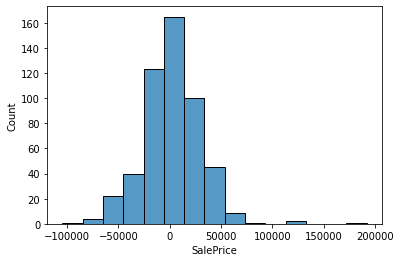

In [36]:
sns.histplot(residuals, bins=15);
#This looks like a normal distribution so this doesn't look too bad.

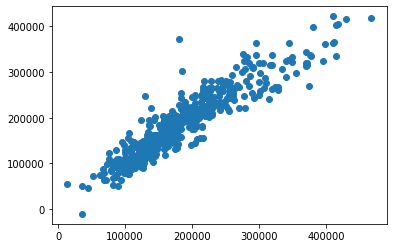

In [37]:
plt.scatter(y_test, preds);
#This doesn't look too bad!

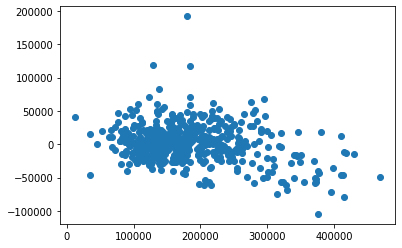

In [38]:
plt.scatter(y_test, residuals);
#That outlier at 200,000 is strange.

In [39]:
#Now, I want to use my Ridge model to score the separate test dataset so 
# that I can submit a csv file to Kaggle for the contest.

df_ames_test = pd.read_csv('./datasets/test.csv')

In [40]:
df_ames_test.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD


In [41]:
#Pull off only the data I need
df_mini_ridge_test = df_ames_test[['Gr Liv Area', 'Garage Cars',
'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath',
'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1',
'Open Porch SF', 'Wood Deck SF', 'Lot Area']]

In [42]:
#Yay!  No missing data here!
df_mini_ridge_test.isna().sum()

Gr Liv Area       0
Garage Cars       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
TotRms AbvGrd     0
Fireplaces        0
BsmtFin SF 1      0
Open Porch SF     0
Wood Deck SF      0
Lot Area          0
dtype: int64

In [43]:
df_mini_ridge_test.describe()

,Gr Liv Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,TotRms AbvGrd,Fireplaces,BsmtFin SF 1,Open Porch SF,Wood Deck SF,Lot Area
count,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1496.914579,1.742597,1034.357631,1145.787016,1970.492027,1984.417995,1.539863,6.454442,0.618451,441.328018,47.070615,93.430524,10307.033030
std,506.468967,0.750391,413.446291,375.264111,30.395895,20.450725,0.559060,1.596632,0.669571,438.457329,68.180939,121.181702,10002.674602
min,407.000000,0.000000,0.000000,407.000000,1880.000000,1950.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1477.000000
25%,1114.000000,1.000000,789.000000,864.000000,1954.000000,1967.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,7297.250000
50%,1436.000000,2.000000,975.000000,1063.000000,1972.000000,1992.000000,2.000000,6.000000,1.000000,373.000000,27.000000,0.000000,9446.000000
75%,1779.000000,2.000000,1247.000000,1358.000000,1999.750000,2003.000000,2.000000,7.000000,1.000000,734.750000,69.750000,170.750000,11589.000000
max,4476.000000,4.000000,2630.000000,2674.000000,2010.000000,2010.000000,4.000000,12.000000,3.000000,2288.000000,742.000000,690.000000,215245.000000


In [44]:
X_mini_ridge_test = df_mini_ridge_test

In [45]:
preds_rdg_kag = gs2.predict(X_mini_ridge_test)

In [46]:
df_ames_test['SalePrice'] = preds_rdg_kag

In [47]:
df_ames_test[['Id', 'SalePrice']].to_csv('./datasets/rdg_predictions.csv', index = False)

#Used code from Chuck's Breakfast Hour Quiz3 Review

In [48]:
df_kaggle = pd.read_csv('./datasets/rdg_predictions.csv')

In [49]:
df_kaggle.head(2)

,Id,SalePrice
0,2658,128242.570472
1,2718,223470.547530
